In [ ]:
import pandas as pd
import numpy as np

import os 

for dir_name, _, file_names in os.walk("plant-pathology-2020-fgvc7"):
    for file_name in file_names:
        print(os.path.join(dir_name, file_name))

In [2]:
dir_path = "plant-pathology-2020-fgvc7/images/"

In [3]:
print("Loading Training Data Labels from CSV file .......")
train = pd.read_csv("plant-pathology-2020-fgvc7/train.csv")
train.head(10)

Loading Training Data Labels from CSV file .......


,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
5,Train_5,1,0,0,0
6,Train_6,0,1,0,0
7,Train_7,0,0,0,1
8,Train_8,0,0,0,1
9,Train_9,1,0,0,0


In [4]:
train["label"] = train[["healthy","multiple_diseases","rust","scab"]].idxmax(axis=1)

label_mapping = {"healthy":0 ,"multiple_diseases":1 ,"rust":2, "scab":3}
train["label"] = train["label"].map(label_mapping)

train.head()

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0


In [5]:
from  re import search
import shutil
# import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

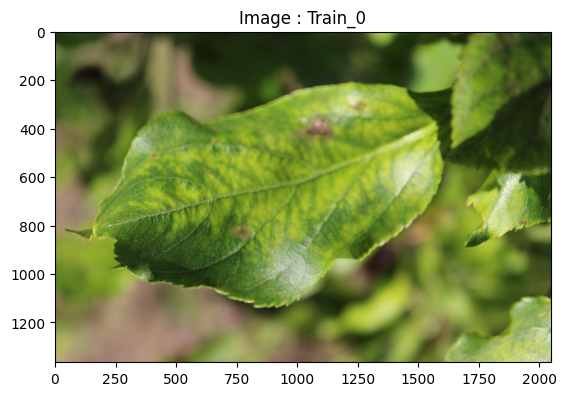

In [6]:
image_open = Image.open(dir_path + "Train_0.jpg")
plt.imshow(image_open)
plt.title("Image : Train_0")
plt.show()

In [7]:
import re
def get_label(img):
    if re.search("Train",img):
        img = img.split('.')[0]
        label = train.loc[train["image_id"] == img, "label"].values[0]
        return label 
    elif re.search("Test",img):
        pass   

In [8]:
dir_path2 = "Plant_pathology/working/images/"

In [9]:
from sklearn.model_selection import train_test_split
import natsort



def copy_image_to_its_folder(dir_path, dir_path2):
    images = natsort.natsorted([img for img in os.listdir(dir_path) if img.startswith('Train_')])  # Filter images
    
    # Split the images into train and test sets
    train_images, test_images = train_test_split(images, test_size=0.3, random_state=42)
    
    # Create train and test directories if they don't exist
    train_dir = os.path.join(dir_path2, 'train')
    test_dir = os.path.join(dir_path2, 'test')
    for directory in [train_dir, test_dir]:
        if not os.path.exists(directory):
            os.makedirs(directory)
    
    # Copy images to train or test directories
    for img in tqdm(train_images):
        copy_image(img, dir_path, train_dir)
    
    for img in tqdm(test_images):
        copy_image(img, dir_path, test_dir)

def copy_image(img, src_dir, dest_dir):
    label = get_label(img)  # Getting label of the image
    src_path = os.path.join(src_dir, img)  # Original path of the image
    dest_label_dir = os.path.join(dest_dir, get_label_folder(label))
    
    if not os.path.exists(dest_label_dir):
        os.makedirs(dest_label_dir)
    
    shutil.copy(src_path, dest_label_dir)

def get_label_folder(label):
    label_mapping = {0: 'healthy', 1: 'multiple_diseases', 2: 'rust', 3: 'scab'}
    return label_mapping[label.item()]

In [10]:
data_dir = copy_image_to_its_folder(dir_path, dir_path2)

100%|██████████| 547/547 [00:00<00:00, 982.85it/s] 


In [11]:
tr_h = len(os.listdir('/Users/macmini/Desktop/My work/begin_cnn/Plant_pathology/Plant_pathology/working/images/Train/healthy'))
tr_s = len(os.listdir('/Users/macmini/Desktop/My work/begin_cnn/Plant_pathology/Plant_pathology/working/images/Train/scab'))
tr_r =  len(os.listdir('/Users/macmini/Desktop/My work/begin_cnn/Plant_pathology/Plant_pathology/working/images/Train/rust'))
tr_md = len(os.listdir('/Users/macmini/Desktop/My work/begin_cnn/Plant_pathology/Plant_pathology/working/images/Train/multiple_diseases'))
# /Users/macmini/Desktop/My work/begin_cnn/Plant_pathology/Plant_pathology/working/images/Test
te_h = len(os.listdir('/Users/macmini/Desktop/My work/begin_cnn/Plant_pathology/Plant_pathology/working/images/Test/healthy'))
te_s = len(os.listdir('/Users/macmini/Desktop/My work/begin_cnn/Plant_pathology/Plant_pathology/working/images/Test/scab'))
te_r =  len(os.listdir('/Users/macmini/Desktop/My work/begin_cnn/Plant_pathology/Plant_pathology/working/images/Test/rust'))
te_md = len(os.listdir('/Users/macmini/Desktop/My work/begin_cnn/Plant_pathology/Plant_pathology/working/images/Test/multiple_diseases'))

# print('Images file count:', len(os.listdir('/kaggle/input/plant-pathology-2020-fgvc7/images')))

print('Train Healthy file count:', tr_h)
print('Train Scab file count:', tr_s)
print('Train Rust file count:', tr_r)
print('Train MD file count:', tr_md)
print('Train file count:', tr_h + tr_s + tr_r + tr_md)

print(' ')

print('Test Healthy file count:', te_h)
print('Test Scab file count:', te_s)
print('Test Rust file count:', te_r)
print('Test MD file count:', te_md)
print('Test file count:', te_h + te_s + te_r + te_md)

Train Healthy file count: 368
Train Scab file count: 407
Train Rust file count: 437
Train MD file count: 62
Train file count: 1274
 
Test Healthy file count: 148
Test Scab file count: 185
Test Rust file count: 185
Test MD file count: 29
Test file count: 547


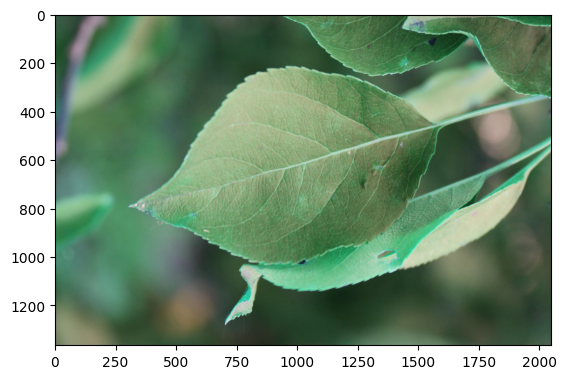

In [12]:
Train_dir = dir_path2 + '/Train/'
Categories = ["healthy","multiple_diseases","rust","scab"]
for i in Categories:
    path = os.path.join(Train_dir,i)
    for img in os.listdir(path):
        old_image = cv2.imread(os.path.join(path,img), cv2.COLOR_BGR2RGB)
        new_image = cv2.resize(old_image, (256,256))
        plt.imshow(old_image)
        plt.show()
        break
    break   

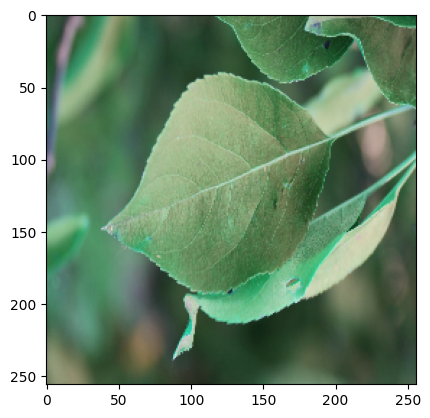

In [13]:
new_image = cv2.resize(old_image,(256,256))
plt.imshow(new_image)
plt.show()

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
datagen = ImageDataGenerator(
    rescale = 1/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip= True,
    vertical_flip = True,
    validation_split = 0.2
)

train_datagen = datagen.flow_from_directory(
    Train_dir,
    target_size = (256,256),
    batch_size = 16,
    class_mode = "categorical",
    subset = 'training'
)

val_datagen = datagen.flow_from_directory(Train_dir,
                                          target_size = (256,256),
                                          batch_size =16,
                                          class_mode = 'categorical',
                                          subset = 'validation')

Found 1021 images belonging to 4 classes.
Found 253 images belonging to 4 classes.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense,Activation,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout,BatchNormalization

In [17]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(256,256,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 64)        0

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [20]:
model.compile(optimizer="adam",loss="categorical_crossentropy",
              metrics=["accuracy"])

In [21]:
checkpoint=ModelCheckpoint('apple_tree_diseases.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)

earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0.001,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [22]:
model_history = model.fit(train_datagen, validation_data=val_datagen,
                          epochs = 30,
                          callbacks =callbacks)

Epoch 1/30
64/64 [==============================] - ETA: 0s - loss: 1.2662 - accuracy: 0.3193
Epoch 1: val_loss improved from inf to 1.23766, saving model to apple_tree_diseases.h5
64/64 [==============================] - 41s 634ms/step - loss: 1.2662 - accuracy: 0.3193 - val_loss: 1.2377 - val_accuracy: 0.3320
Epoch 2/30


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


64/64 [==============================] - ETA: 0s - loss: 1.2467 - accuracy: 0.3310
Epoch 2: val_loss did not improve from 1.23766
64/64 [==============================] - 40s 628ms/step - loss: 1.2467 - accuracy: 0.3310 - val_loss: 1.2391 - val_accuracy: 0.3439
Epoch 3/30
64/64 [==============================] - ETA: 0s - loss: 1.2451 - accuracy: 0.3262
Epoch 3: val_loss did not improve from 1.23766
64/64 [==============================] - 41s 628ms/step - loss: 1.2451 - accuracy: 0.3262 - val_loss: 1.2774 - val_accuracy: 0.3439
Epoch 4/30
64/64 [==============================] - ETA: 0s - loss: 1.2486 - accuracy: 0.3340
Epoch 4: val_loss did not improve from 1.23766
64/64 [==============================] - 42s 657ms/step - loss: 1.2486 - accuracy: 0.3340 - val_loss: 1.2428 - val_accuracy: 0.3202
Epoch 5/30
64/64 [==============================] - ETA: 0s - loss: 1.2494 - accuracy: 0.3379
Epoch 5: val_loss did not improve from 1.23766
64/64 [==============================] - 42s 659ms/

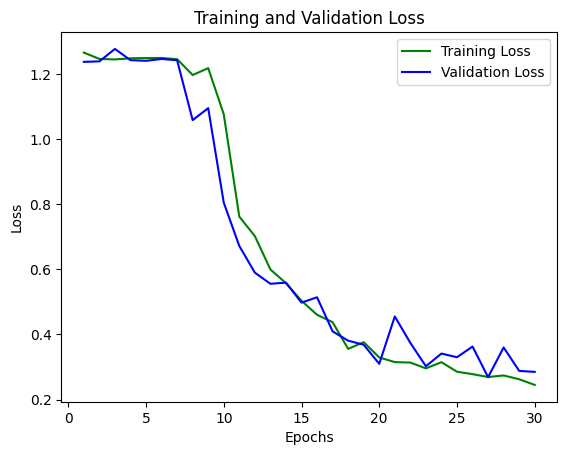

In [23]:
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,31)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

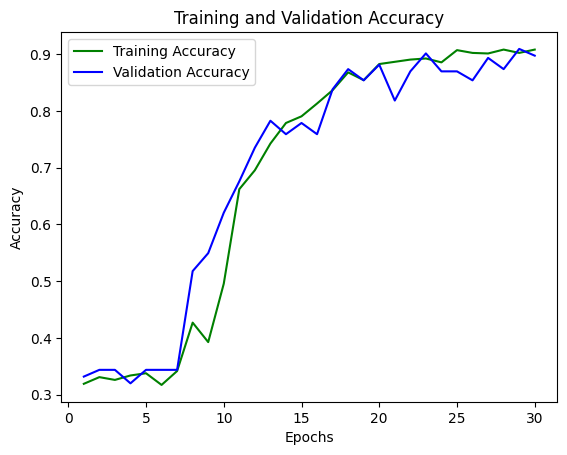

In [24]:
train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
epoachs = range(1,31)
plt.plot(epoachs,train_acc,'g',label='Training Accuracy')
plt.plot(epoachs,val_acc,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [33]:
from tensorflow.keras.preprocessing import image
id2label = {0:"healthy" ,1:"multiple_diseases" ,2:"rust", 3:"scab"}

test_image = "/Users/macmini/Desktop/My work/begin_cnn/Plant_pathology/Plant_pathology/working/images/Test/rust/Train_58.jpg"
image_result = Image.open(test_image)

test_image = image.load_img(test_image,target_size=(256,256))
test_image = image.img_to_array(test_image)
test_image = test_image / 255
test_image = np.expand_dims(test_image,axis=0)
res = model.predict(test_image) 
predicted_label = id2label[np.argmax(res)]
print("This image is ",predicted_label,"🍀")

1/1 [==============================] - 0s 28ms/step
This image is  rust 🍀


In [36]:
predicted_results = []

# Iterate through all files in the test folder and its subfolders
for root, dirs, files in os.walk("/Users/macmini/Desktop/My work/begin_cnn/Plant_pathology/Plant_pathology/working/images/Test"):
    for file in files:
        if file.endswith((".jpg")):
            test_image_path = os.path.join(root, file)

            # Load and preprocess the image 
            image_result = Image.open(test_image_path)
            test_image = image.load_img(test_image_path, target_size=(256,256))
            test_image = image.img_to_array(test_image)
            test_image = test_image / 255 
            test_image = np.expand_dims(test_image, axis=0)

            # Make predictions 
            res = model.predict(test_image)
            predicted_results.append(np.argmax(res))

1/1 [==============================] - 0s 19ms/step


In [37]:
np.shape(predicted_results)

(547,)

In [40]:
results = []
for root, dirs, files in os.walk("/Users/macmini/Desktop/My work/begin_cnn/Plant_pathology/Plant_pathology/working/images/Test"):
    for img in files:
        results.append(get_label(img))


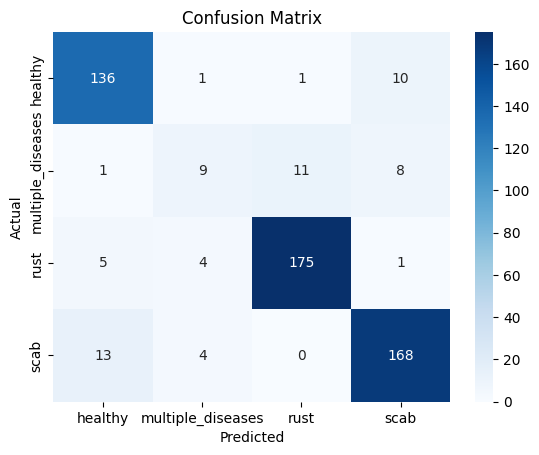

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
# Create confusion matrix
conf_mat = confusion_matrix(results, predicted_results)

# Plot the confusion matrix
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels = Categories,
            yticklabels = Categories)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [42]:
# Generate a classification report
class_report = classification_report(results, predicted_results,
                                     target_names=Categories)
print("Classification Report:\n", class_report)

Classification Report:
                    precision    recall  f1-score   support

          healthy       0.88      0.92      0.90       148
multiple_diseases       0.50      0.31      0.38        29
             rust       0.94      0.95      0.94       185
             scab       0.90      0.91      0.90       185

         accuracy                           0.89       547
        macro avg       0.80      0.77      0.78       547
     weighted avg       0.88      0.89      0.89       547

